In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating Data to view and fit


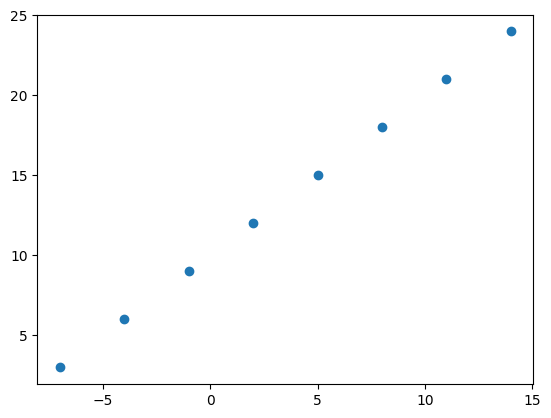

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Create Features
X = np.array([-7.0,-4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X,y)

In [ ]:
## example input and output shapes of a regression model
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

### Using tensors


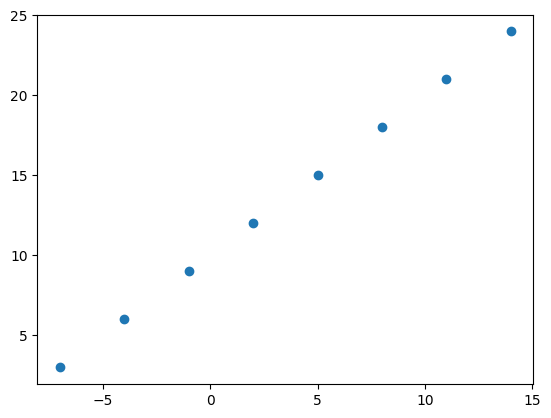

In [ ]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

#### Our goal here will be to use X to predict y.


So our input will be X and our output will be y

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

### Steps in Modelling in Tensorflow

In [ ]:
# Set random seed
tf.random.set_seed(42)

#Create a model using sequential API
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"]
)

#Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,  epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 501ms/step - loss: 10.0026 - mae: 10.0026
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 9.8701 - mae: 9.8701
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 9.7376 - mae: 9.7376
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 9.6051 - mae: 9.6051
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 9.4726 - mae: 9.4726


In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Prediction
model.predict([17.0])

1/1 [==============================] - 0s 108ms/step


array([[20.0123]], dtype=float32)

###Improving a Model

In [ ]:
# make a bigger dataset
X = np.arange(-100,100,4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
#make labels for the dataset
y = np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Split data into training/test set
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40]  # first 40 samples (80% of data)
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

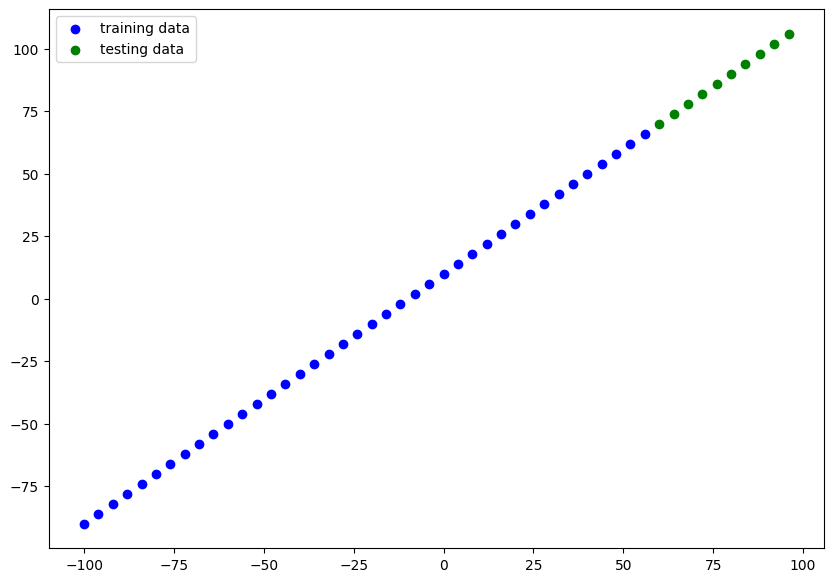

In [ ]:
##Visualize Data
plt.figure(figsize=(10,7))
# Plotting training data in blue
plt.scatter(X_train, y_train,c='b', label='training data')
#plotting test data in green
plt.scatter(X_test, y_test,c='g',label= 'testing data')
plt.legend();


In [ ]:
tf.random.set_seed(42)

# Create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
#Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

### Visualizing a model

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=2) # verbose controls how much gets output

Epoch 1/100
2/2 - 0s - loss: 31.7491 - mae: 31.7491 - 324ms/epoch - 162ms/step
Epoch 2/100
2/2 - 0s - loss: 8.9142 - mae: 8.9142 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 9.7818 - mae: 9.7818 - 11ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 11.9618 - mae: 11.9618 - 14ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 11.0258 - mae: 11.0258 - 15ms/epoch - 8ms/step
Epoch 6/100
2/2 - 0s - loss: 10.1845 - mae: 10.1845 - 12ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 9.2001 - mae: 9.2001 - 12ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 9.1334 - mae: 9.1334 - 16ms/epoch - 8ms/step
Epoch 9/100
2/2 - 0s - loss: 11.7476 - mae: 11.7476 - 13ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 13.6681 - mae: 13.6681 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 11.7368 - mae: 11.7368 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 16.4379 - mae: 16.4379 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 11.9629 - mae: 11.9629 - 11ms/epoch - 6ms/step
Epoch 14/100


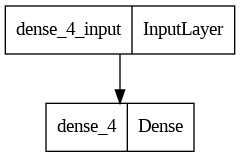

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)

### Visualizing the Predictions


In [ ]:
#make predictions
y_pred = model.predict(X_test)


1/1 [==============================] - 0s 64ms/step


In [ ]:
y_pred

array([[56.55604 ],
       [60.239155],
       [63.922268],
       [67.60538 ],
       [71.28848 ],
       [74.971596],
       [78.65471 ],
       [82.337814],
       [86.02093 ],
       [89.70404 ]], dtype=float32)

In [ ]:
#we made a function for plotting the graph
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions= y_pred):
  plt.figure(figsize=(10,7))
  # plt training data in blue
  plt.scatter(train_data,train_labels,c="b",label="training data")
  # plt test data in green
  plt.scatter(test_data,test_labels,c="g",label="testing data")
  #plt predictions in red(predictions are made on testing data)

  plt.scatter(test_data,predictions, c="r",label="Predicted data")
  plt.legend();



In [ ]:
y_test.shape,y_pred.shape

((10,), (10, 1))

In [ ]:
y_pred.squeeze().shape

(10,)

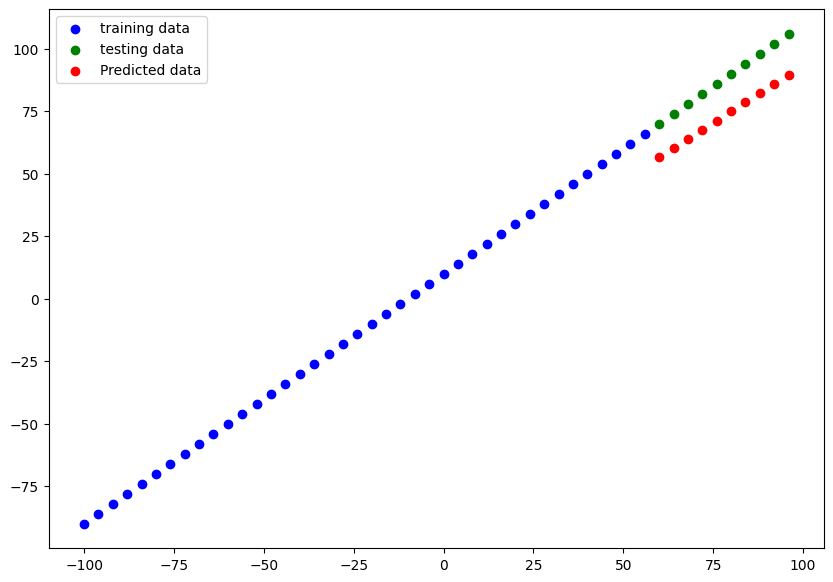

In [ ]:
plot_predictions(train_data= X_train,
                 train_labels= y_train,
                 test_data = X_test,
                 test_labels= y_test,
                 predictions = y_pred
                )

### Evaluating Predictions


### Two of the main metrics used for regression problems are:

Mean absolute error (MAE) - the mean difference between each of the predictions.
Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 130ms/step - loss: 14.8700 - mae: 14.8700


[14.869958877563477, 14.869958877563477]

In [ ]:
#calculate mean absolute error
mae= tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred= y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([31.443958, 27.760845, 24.077732, 20.394623, 16.969213, 14.217043,
       12.138117, 10.732437, 10.      , 10.      ], dtype=float32)>

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y_pred

array([[56.55604 ],
       [60.239155],
       [63.922268],
       [67.60538 ],
       [71.28848 ],
       [74.971596],
       [78.65471 ],
       [82.337814],
       [86.02093 ],
       [89.70404 ]], dtype=float32)

In [ ]:
y_pred.shape

(10, 1)

In [ ]:
#lets fix the shapes for y_pred
y_test, y_pred.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([56.55604 , 60.239155, 63.922268, 67.60538 , 71.28848 , 74.971596,
        78.65471 , 82.337814, 86.02093 , 89.70404 ], dtype=float32))

In [ ]:
#Calculate MAE
mae = tf.metrics.mean_absolute_error(y_true= y_test,
                                     y_pred= y_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.869959>

In [ ]:
# Calculate MSE
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=221.94414>

In [ ]:
# other way
tf.reduce_mean(tf.abs(y_test-y_pred.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=14.869958877563477>

In [ ]:
##lets create a function to calculate mae and mse

def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test,y_pred)

def mse(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_test,y_pred)




### Improving the model

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.

In [ ]:
## Model 1
tf.random.set_seed(42)

# create the model
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs=100)





Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 16.1326 - mae: 16.1326
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 12.8284 - mae: 12.8284
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.4486 - mae: 11.4486
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4634 - mae: 9.4634
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3579 - mae: 10.3579
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5970 - mae: 9.5970
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.7091 - mae: 8.7091
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0517 - mae: 9.0517
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 19.1072 - mae: 19.1072
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3089 - mae: 10.3089
Epoch 11/100
2/2 [==============================] - 0s 9ms/step 

1/1 [==============================] - 0s 20ms/step


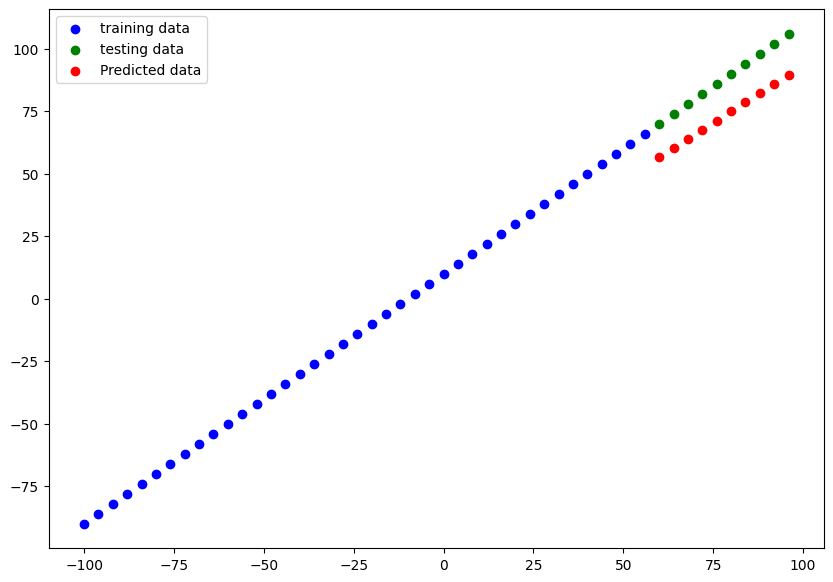

In [ ]:
# predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1


(14.885839, 222.42097)

In [ ]:
##model 2
tf.random.set_seed(42)

model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) #add a second layer
])

# compile a model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['mae'])

# fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100, verbose=1)



Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 39.7570 - mae: 39.7570
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6266 - mae: 24.6266
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 15.0186 - mae: 15.0186
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9812 - mae: 14.9812
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.4146 - mae: 14.4146
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.4688 - mae: 11.4688
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7983 - mae: 10.7983
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9038 - mae: 10.9038
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 38.4549 - mae: 38.4549
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.9694 - mae: 25.9694
Epoch 11/100
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 118ms/step


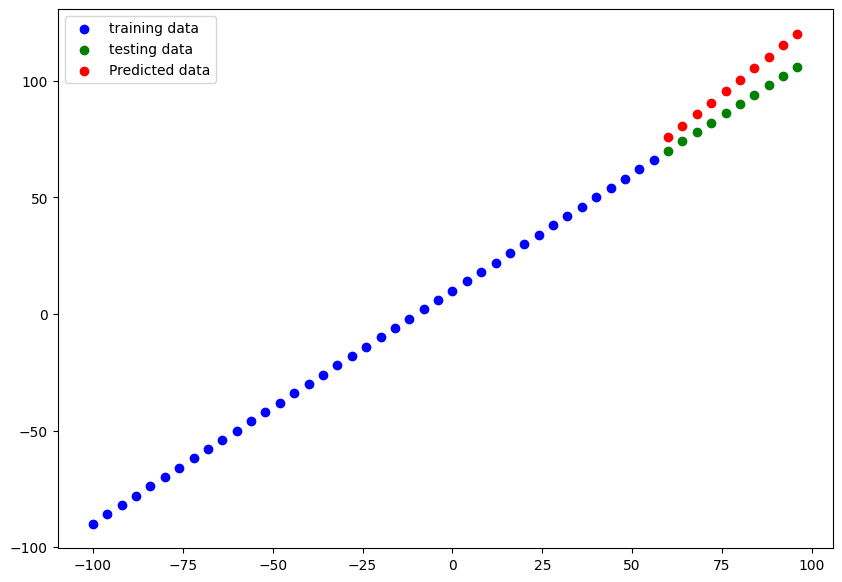

In [ ]:
# predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(9.9487095, 106.177536)

In [ ]:
#Build model 3
tf.random.set_seed(42)

model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) #add a second layer
])

# compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['mae'])

# fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=500, verbose=1)


Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 44.4457 - mae: 44.4457
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 17.1841 - mae: 17.1841
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 19.7950 - mae: 19.7950
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 13.4475 - mae: 13.4475
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 13.8501 - mae: 13.8501
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.5358 - mae: 11.5358
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 9.2812 - mae: 9.2812
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 16.4808 - mae: 16.4808
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 29.3577 - mae: 29.3577
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 11.6571 - mae: 11.6571
Epoch 11/500
2/2 [==============================] - 0s 8ms/s

1/1 [==============================] - 0s 53ms/step


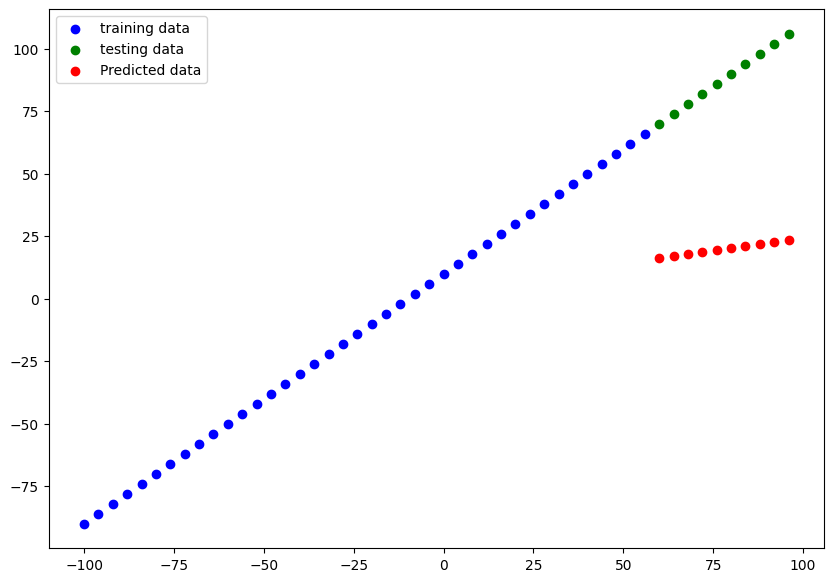

In [ ]:
# predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3


(67.97302, 4704.9204)

### Comparing Results

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,14.885839,222.420975
1,model_2,9.948709,106.177536
2,model_3,67.973022,67.973022


In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')
